In [1]:
# https://www.youtube.com/watch?v=JqTASBiMVT8&ab_channel=EngineerHunter
import numpy as np
import matplotlib.pyplot as plt

# objective function (to be minimized)
def sphere_function(x):
    z = np.sum(np.square(x))
    return z

# Parameters
# H. A. Hefny and S. S. Azab, "Chaotic particle swarm optimization," 2010 The 7th International Conference on Informatics and Systems (INFOS), 2010, pp. 1-8.
swarm_size = 50
c1, c2 = 2.5, 2.5
iterMax = 1000  # Max iterations (Stopping criteria)
inertia_weight = 0.9 - ((0.9-0.4)/iterMax)*np.linspace(0, iterMax, iterMax)
xMin, xMax = -100, 100  # Initial position range
vMin, vMax = xMin, xMax  # Velocity limit (Nao entendi o uso do lambda)
d = 30  # Dimension
Result = np.zeros(iterMax) # Save Gbest values

def limit_velocity(V):
    for i in range(len(V)):
        if V[i] > vMax:
            V[i] = vMax
        if V[i] < vMin:
            V[i] = vMin
    return V

def limit_position(X):
    for i in range(len(X)):
        if X[i] > xMax:
            X[i] = xMax
        if X[i] < xMin:
            X[i] = xMin
    return X        

In [2]:
#%% PSO
# Kennedy, J., & Eberhart, R. (n.d.). Particle swarm optimization. Proceedings of ICNN’95 - International Conference on Neural Networks. doi:10.1109/icnn.1995.488968
def optimization():
    class particle():
        def __init__(self):
            self.position = np.random.uniform(xMin, xMax, [swarm_size,d])
            self.velocity = np.zeros([swarm_size,d])
            # self.velocity = np.random.uniform(vMin, vMax, [swarm_size,d])
            self.cost = np.zeros(swarm_size)
            self.cost[:] = sphere_function(self.position[:])
            self.pbest = np.copy(self.position)
            self.pbest_cost = np.copy(self.cost)
            self.index = np.argmin(self.pbest_cost)
            self.gbest = self.pbest[self.index]
            self.gbest_cost = self.pbest_cost[self.index]
            self.best_cost_iteration = np.zeros(iterMax)
        def evaluate(self):
            for i in range(iterMax):
                for ii in range(swarm_size):
                    self.velocity[ii] = (inertia_weight[i]*self.velocity[ii]
                                        +c1*np.random.rand(d)*(self.pbest[ii]-self.position[ii])
                                        +c2*np.random.rand(d)*(self.gbest-self.position[ii]))
                    self.velocity[ii] = limit_velocity(self.velocity[ii])
                    self.position[ii] = self.position[ii] + self.velocity[ii]
                    # self.position[ii] = limit_position(self.position[ii])
                    self.cost[ii] = sphere_function(self.position[ii])
                    if self.cost[ii] < self.pbest_cost[ii]:
                        self.pbest[ii] = self.position[ii]
                        self.pbest_cost[ii] = self.cost[ii]
                        if self.pbest_cost[ii] < self.gbest_cost:
                            self.gbest_cost = self.pbest_cost[ii]
                self.best_cost_iteration[i] = self.gbest_cost                        
        def plot(self):
            plt.semilogy(self.best_cost_iteration)
            plt.ylabel('Best function value')
            plt.xlabel('Number of iteration')            
            plt.title('PSO of sphere function')            
            print("Gbest", self.gbest_cost)                    
    a = particle()     
    a.evaluate()
    a.plot()

Gbest 37217.4186462546
Gbest 37587.39999536878
Gbest 39039.8150210811
Gbest 29218.753994815976
Gbest 36576.769991663605
Gbest 34063.2595264977
Gbest 30176.34220087694
Gbest 29572.114250681938
Gbest 40555.15587349647
Gbest 35773.56239061741
Gbest 22387.680143479865
Gbest 45313.5823170193
Gbest 28389.839751257274
Gbest 30150.499850688037
Gbest 35224.675937505504
Gbest 44314.256369367846
Gbest 32117.39675070481
Gbest 33759.97095938811
Gbest 39719.05923514878
Gbest 26521.547137527912
Gbest 34101.833681715005
Gbest 35936.76082776796
Gbest 37371.049937356656
Gbest 43311.4880168634
Gbest 44783.07066043446
Gbest 40456.81135805326
Gbest 26552.877659682643
Gbest 25181.83566403387
Gbest 33209.02095471537
Gbest 22654.541241320225
Gbest 35836.388067763284
Gbest 36597.320613540076
Gbest 34706.58280198008
Gbest 32283.26073568045
Gbest 49913.19425130429
Gbest 33102.40012865321
Gbest 45067.15791378831
Gbest 36574.416497175975
Gbest 51544.38515557873
Gbest 31055.614611911908
Gbest 39977.676130302476
Gbe

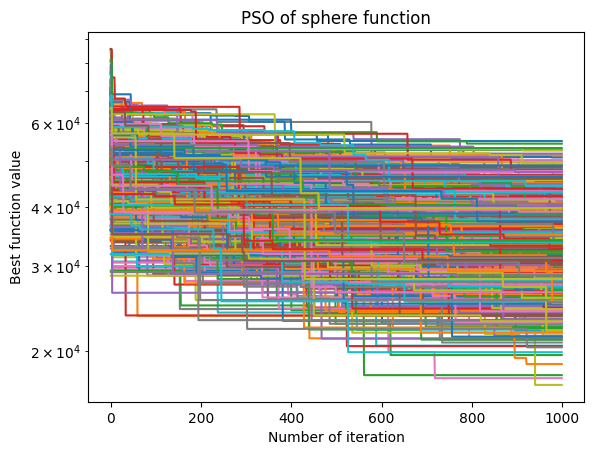

In [3]:
#%% Run
for i in range(iterMax):
    Gbest = optimization()   